<a href="https://colab.research.google.com/github/ayoub-ait-idir/Titanic-Competition/blob/main/Titanic_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Repo

In [1]:
! pwd

/content


In [2]:
! git clone https://github.com/ayoub-ait-idir/Titanic-Competition.git

Cloning into 'Titanic-Competition'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [3]:
cd /content/Titanic-Competition

/content/Titanic-Competition


In [4]:
!ls

gender_submission.csv  test.csv			  train.csv
README.md	       Titanic_Competition.ipynb


In [5]:
!rm -rf README.md

In [6]:
!ls

gender_submission.csv  test.csv  Titanic_Competition.ipynb  train.csv


In [7]:
cd /content/Titanic-Competition/Titanic-Competition

[Errno 2] No such file or directory: '/content/Titanic-Competition/Titanic-Competition'
/content/Titanic-Competition


In [8]:
!ls

gender_submission.csv  test.csv  Titanic_Competition.ipynb  train.csv


# Import Packages

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns


# Import Data

In [10]:
# import train and test data
train = pd.read_csv('/content/Titanic-Competition/train.csv')
test  = pd.read_csv('/content/Titanic-Competition/test.csv')
gender_submission = pd.read_csv('/content/Titanic-Competition/gender_submission.csv')

In [11]:
# View train Data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# View test Data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# View gender submession Data
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Repetitive Data - Duplicates

In [18]:
# Extraire les lignes dupliquées dans duplicate
duplicate_train = train[train.duplicated()]
duplicate_test = test[test.duplicated()]

print('le pourcentage des lignes dupliquées = {} %'.format(round(len(duplicate_train)/len(train)*100)))
print('le pourcentage des lignes dupliquées = {} %'.format(round(len(duplicate_test)/len(test)*100)))

le pourcentage des lignes dupliquées = 0 %
le pourcentage des lignes dupliquées = 0 %


# Missing Data

## Train

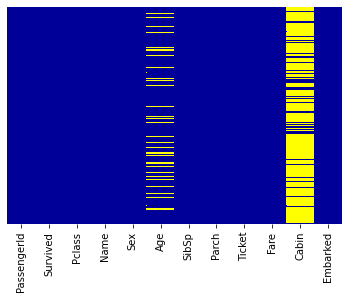

In [21]:
# Heatmap of Missing Values
colours = ['#000099', '#ffff00']
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [25]:
# Calculate the % of missing values in each column 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in train.columns:
  pct_missing = np.mean(train[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 10:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
Age - 19.87%
Cabin - 77.1%


## Test Data

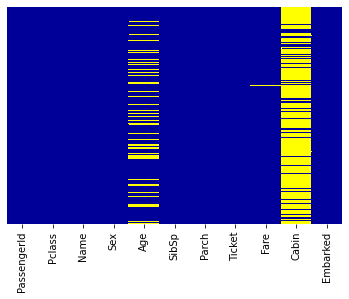

In [26]:
# Heatmap of Missing Values
colours = ['#000099', '#ffff00']
sns.heatmap(test.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [27]:
# Calculate the % of missing values in each column 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in test.columns:
  pct_missing = np.mean(test[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 10:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
Age - 20.57%
Cabin - 78.23%


# Numeric Vs non-Numeric Data

In [31]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols1 = ['Survived','Pclass','Sex','Ticket','Cabin', 'Embarked']
cat_cols2 = ['Pclass','Sex','Ticket','Cabin', 'Embarked']

train_num = train[num_cols]
train_cat = train[cat_cols1]

test_num = test[num_cols]
test_cat = test[cat_cols2]